In [8]:
import pandas as pd
import matplotlib.pyplot as plt
#aprox. time 00:

accidents = pd.read_csv('data/edited_file.csv')
accidents.dtypes

ID                         int64
ID.1                      object
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Street                    object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitation(in)        float64
Weather_Condition         object
Amenity                     bool
Bump      

In [2]:
# Start_Time and End_Time are objects, so we will convert them to DateTime-Objects

accidents['Start_Time'] = pd.to_datetime(accidents['Start_Time'])
accidents['End_Time'] = pd.to_datetime(accidents['End_Time'])

# after that we are able to extract hour, day, month and year of each date

accidents['Hour'] = accidents['Start_Time'].dt.hour
accidents['Day'] = accidents['Start_Time'].dt.day
accidents['Month'] = accidents['Start_Time'].dt.month
accidents['Year'] = accidents['Start_Time'].dt.year

# we will just clean the other datatypes here:
accidents['Weather_Timestamp'] = pd.to_datetime(accidents['Weather_Timestamp'])

# we will see the new added columns (extracted partss of the start date time)
accidents.head()

,ID.1,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Nautical_Twilight,Astronomical_Twilight,Year,Month,Day,Hour,Duration,State Name,Region,Division
ID,,,,,,,,,,,,,,,,,,,,,
0,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,...,Night,Night,2016,2,8,5,18840.0,Ohio,Midwest,East North Central
1,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,...,Night,Day,2016,2,8,6,1800.0,Ohio,Midwest,East North Central
2,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,...,Day,Day,2016,2,8,6,1800.0,Ohio,Midwest,East North Central
3,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,...,Day,Day,2016,2,8,7,1800.0,Ohio,Midwest,East North Central
4,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,...,Day,Day,2016,2,8,7,1800.0,Ohio,Midwest,East North Central


In [3]:
nan_count = accidents['Temperature(F)'].isna().sum()

print(f"Anzahl der NaN-Werte in der 'Temperature(F)'-Spalte: {nan_count}")

Anzahl der NaN-Werte in der 'Temperature(F)'-Spalte: 163853


In [4]:
# Example for Binning

#dropping al NaN (Temperature) rows
accidents_cleaned = accidents.dropna(subset=['Temperature(F)'])

#setting edges by ourself, because otherwise all tempperatures will result in 'moderate' when we let it automatically decide
bin_edges = [float('-inf'), 32, 50, 65, 80, float('inf')]
bin_labels = ['Very Cold', 'Cold', 'Moderate', 'Warm', 'Hot']
# Setting bins to 5, could also set 3 (cold, moderate, hot)
accidents_cleaned['Temperature_Bin'] = pd.cut(accidents_cleaned['Temperature(F)'], bins=bin_edges, labels=bin_labels)

accidents_cleaned

C:\Users\forte\AppData\Local\Temp\ipykernel_23924\1734423199.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accidents_cleaned['Temperature_Bin'] = pd.cut(accidents_cleaned['Temperature(F)'], bins=bin_edges, labels=bin_labels)


,ID.1,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Astronomical_Twilight,Year,Month,Day,Hour,Duration,State Name,Region,Division,Temperature_Bin
ID,,,,,,,,,,,,,,,,,,,,,
0,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.010,Right lane blocked due to accident on I-70 Eas...,...,Night,2016,2,8,5,18840.0,Ohio,Midwest,East North Central,Cold
1,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.010,Accident on Brice Rd at Tussing Rd. Expect del...,...,Day,2016,2,8,6,1800.0,Ohio,Midwest,East North Central,Cold
2,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.010,Accident on OH-32 State Route 32 Westbound at ...,...,Day,2016,2,8,6,1800.0,Ohio,Midwest,East North Central,Cold
3,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.010,Accident on I-75 Southbound at Exits 52 52B US...,...,Day,2016,2,8,7,1800.0,Ohio,Midwest,East North Central,Cold
4,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.010,Accident on McEwen Rd at OH-725 Miamisburg Cen...,...,Day,2016,2,8,7,1800.0,Ohio,Midwest,East North Central,Cold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,Source1,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.99888,-117.37094,0.543,At Market St - Accident.,...,Day,2019,8,23,18,1716.0,California,West,Pacific,Hot
7728390,Source1,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.76555,-117.15363,0.338,At Camino Del Rio/Mission Center Rd - Accident.,...,Day,2019,8,23,19,1613.0,California,West,Pacific,Warm
7728391,Source1,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.77740,-117.85727,0.561,At Glassell St/Grand Ave - Accident. in the ri...,...,Day,2019,8,23,19,1708.0,California,West,Pacific,Warm


In [5]:
#One-Hot-Encoding
#Encoding all Weather Conditions

accidents_cleaned = pd.get_dummies(accidents_cleaned, columns=['Weather_Condition'], drop_first=True, prefix='Weather')
accidents_cleaned

,ID.1,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Weather_Thunder in the Vicinity,Weather_Thunderstorm,Weather_Thunderstorms and Rain,Weather_Thunderstorms and Snow,Weather_Tornado,Weather_Volcanic Ash,Weather_Widespread Dust,Weather_Widespread Dust / Windy,Weather_Wintry Mix,Weather_Wintry Mix / Windy
ID,,,,,,,,,,,,,,,,,,,,,
0,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.010,Right lane blocked due to accident on I-70 Eas...,...,False,False,False,False,False,False,False,False,False,False
1,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.010,Accident on Brice Rd at Tussing Rd. Expect del...,...,False,False,False,False,False,False,False,False,False,False
2,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.010,Accident on OH-32 State Route 32 Westbound at ...,...,False,False,False,False,False,False,False,False,False,False
3,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.010,Accident on I-75 Southbound at Exits 52 52B US...,...,False,False,False,False,False,False,False,False,False,False
4,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.010,Accident on McEwen Rd at OH-725 Miamisburg Cen...,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,Source1,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.99888,-117.37094,0.543,At Market St - Accident.,...,False,False,False,False,False,False,False,False,False,False
7728390,Source1,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.76555,-117.15363,0.338,At Camino Del Rio/Mission Center Rd - Accident.,...,False,False,False,False,False,False,False,False,False,False
7728391,Source1,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.77740,-117.85727,0.561,At Glassell St/Grand Ave - Accident. in the ri...,...,False,False,False,False,False,False,False,False,False,False


In [6]:
#Creating time series

# Konvertiere 'Start_Time' in ein DateTime-Objekt
accidents_cleaned['Start_Time'] = pd.to_datetime(accidents_cleaned['Start_Time'])

# Setze 'Start_Time' als Index für die Time Series
accidents_cleaned.set_index('Start_Time', inplace=True)

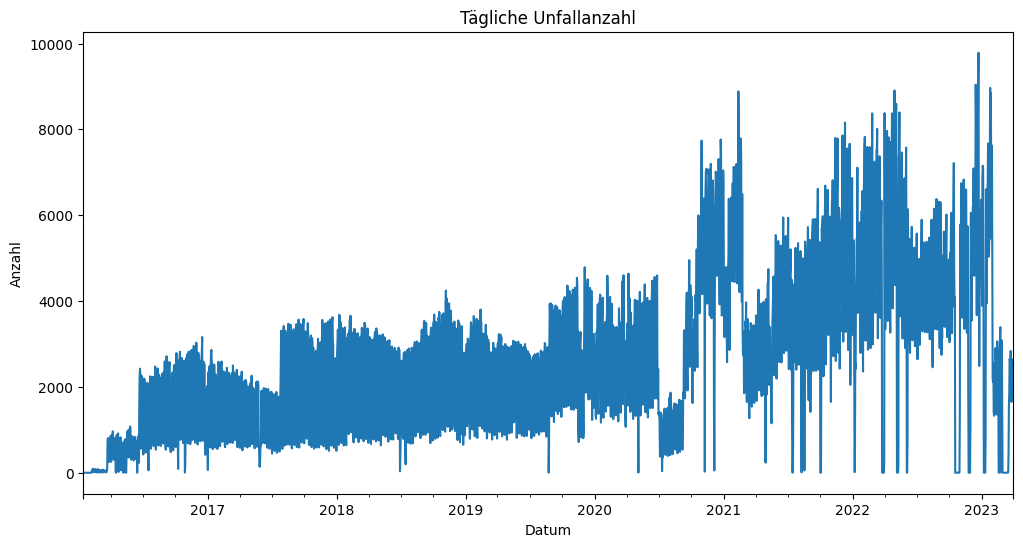

In [7]:
# Calculate daily accidents
daily_accidents = accidents_cleaned.resample('D').size()

# daily accidents graph
plt.figure(figsize=(12, 6))
daily_accidents.plot(title='Tägliche Unfallanzahl', xlabel='Datum', ylabel='Anzahl')
plt.show()